experiment 32/32[[0.64266667 0.95073529 1.         1.        ]
 [0.67356275 0.9875     0.97532976 0.99130435]
 [0.82026938 0.97651738 0.99130435 1.        ]
 [0.70059259 0.84964159 0.97037037 1.        ]
 [0.6255725  0.70238462 0.88344018 0.95197043]
 [0.56136364 0.504625   0.84721947 0.87935057]
 [0.496625   0.5055625  0.505875   0.56140262]
 [0.49840625 0.4985625  0.4985     0.49421875]]


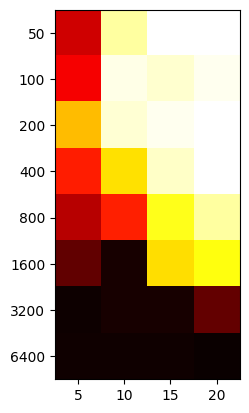

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ema_workbench.analysis import prim

def generate_points(n, m):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(n, m)
    
    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], n, replace=True)
    
    # Return as a dictionary
    return x, y

pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 20]  # number of dimensions to experiment with
res = np.empty((len(pts), len(atrs)))  # matrix with the results
res[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec = []
        for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            x, y = generate_points(pts[n], atrs[m])
            prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
            box1 = prim_alg.find_box()
            prec_temp = []
            while box1 is not None:
                prec_temp.append(box1.density)
                box1 = prim_alg.find_box()
            prec.sort()
            prec_temp.reverse()
            prec.append(prec_temp.pop())
        res[n, m] = np.mean(prec)
        k = k + 1
        
print(res)

plt.imshow(res, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()

In [5]:
print(res)

[[0.93647059 0.98947368 1.         1.        ]
 [0.75989916 0.96908213 0.99130435 1.        ]
 [0.71147619 0.96874447 0.98461538 1.        ]
 [0.58071429 0.75516073 0.99354839 0.98959157]
 [0.495      0.72115078 0.90810365 0.9470181 ]
 [0.495375   0.63649815 0.7085855  0.79486885]
 [0.5000625  0.5033125  0.4964375  0.4935    ]
 [0.4946875  0.50015625 0.4961875  0.49846875]]
